In [1]:
# Importing our necessary libraries

import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure 
from shapely.geometry import Point
import geopandas as gpd
import contextily as ctx


%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (15,30) #Adjusts the configuration size of our plots

In [2]:
# Reading in datasets

df = pd.read_csv('miami_housing.csv')
miami = gpd.read_file('miami_shapefile/29bff735-eb32-4f2a-a5c8-b44c1572fb562020330-1-1f31kr.sdvjb.shp')

In [3]:
df.head()

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,RAIL_DIST,OCEAN_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age
0,25.891031,-80.160561,440000.0,9375,2815.9,12811.4,42815.3,37742.2,15954.9,67
1,25.891324,-80.153968,349000.0,9375,4359.1,10648.4,43504.9,37340.5,18125.0,63
2,25.891334,-80.153740,800000.0,9375,4412.9,10574.1,43530.4,37328.7,18200.5,61
3,25.891765,-80.152657,988000.0,12450,4585.0,10156.5,43797.5,37423.2,18514.4,63
4,25.891825,-80.154639,755000.0,12800,4063.4,10836.8,43599.7,37550.8,17903.4,42


In [4]:
df.columns

Index(['LATITUDE', 'LONGITUDE', 'SALE_PRC', 'LND_SQFOOT', 'RAIL_DIST',
       'OCEAN_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age'],
      dtype='object')

In [5]:
# Plotting correlation subplots using Matplotlib and Seaborn
# Independent variable: SALE_PRC

columns = ['SALE_PRC', 'LND_SQFOOT', 'RAIL_DIST',
       'OCEAN_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age']

In [6]:
df_sale = df[['SALE_PRC']]
df_cols = df[['LND_SQFOOT', 'RAIL_DIST', 'OCEAN_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age']]

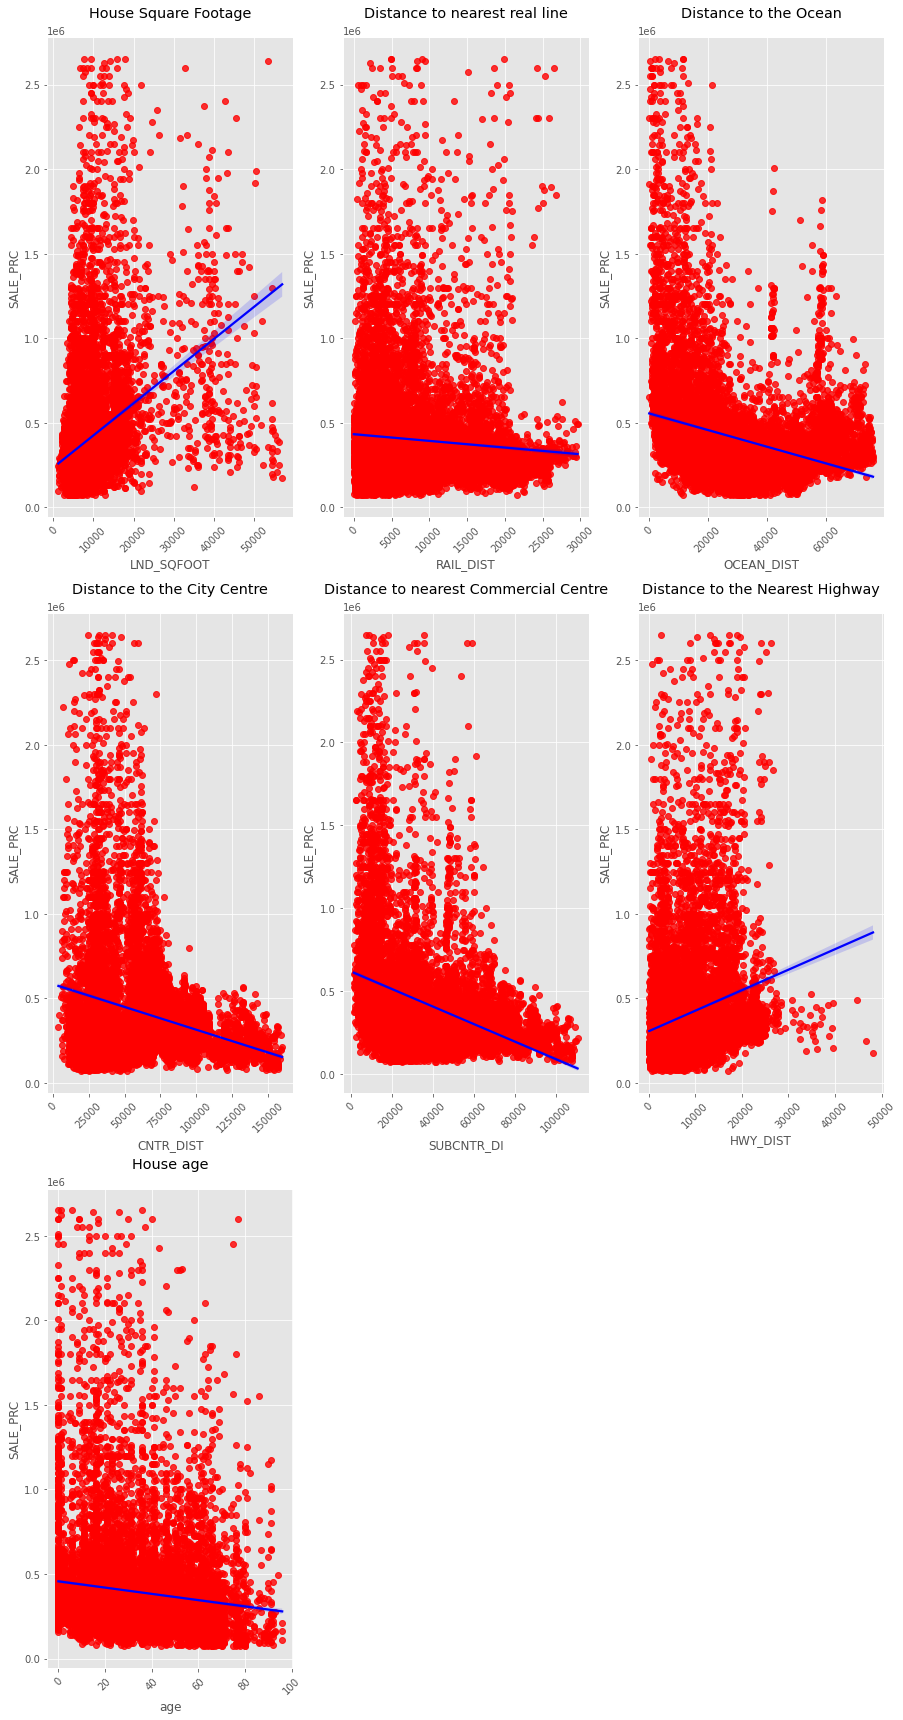

In [7]:
# Creating seven different correlation plots, with sale price serving as the dependent variable.

# Titles for each subplot
titles = ['House Square Footage',
          'Distance to nearest real line',
          'Distance to the Ocean',
         'Distance to the City Centre',
         'Distance to nearest Commercial Centre',
         'Distance to the Nearest Highway',
         'House age']

# Loop for plotting each column. Note: The included count iterator is specifically used for iterating through titles.
fig, axes = plt.subplots(3, 3)

count = 0 
for i, (col, ax) in enumerate(zip(df_cols, axes.flat), 0):
    sns.regplot(data=df_cols, x=col, y=df_sale['SALE_PRC'], ax=ax, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
    ax.set_title(titles[count], pad=20)
    ax.tick_params(axis='x', rotation=45)
    count+=1
fig.delaxes(axes[2][1])
fig.delaxes(axes[2][2])
# plt.savefig('miami_correlations.png')

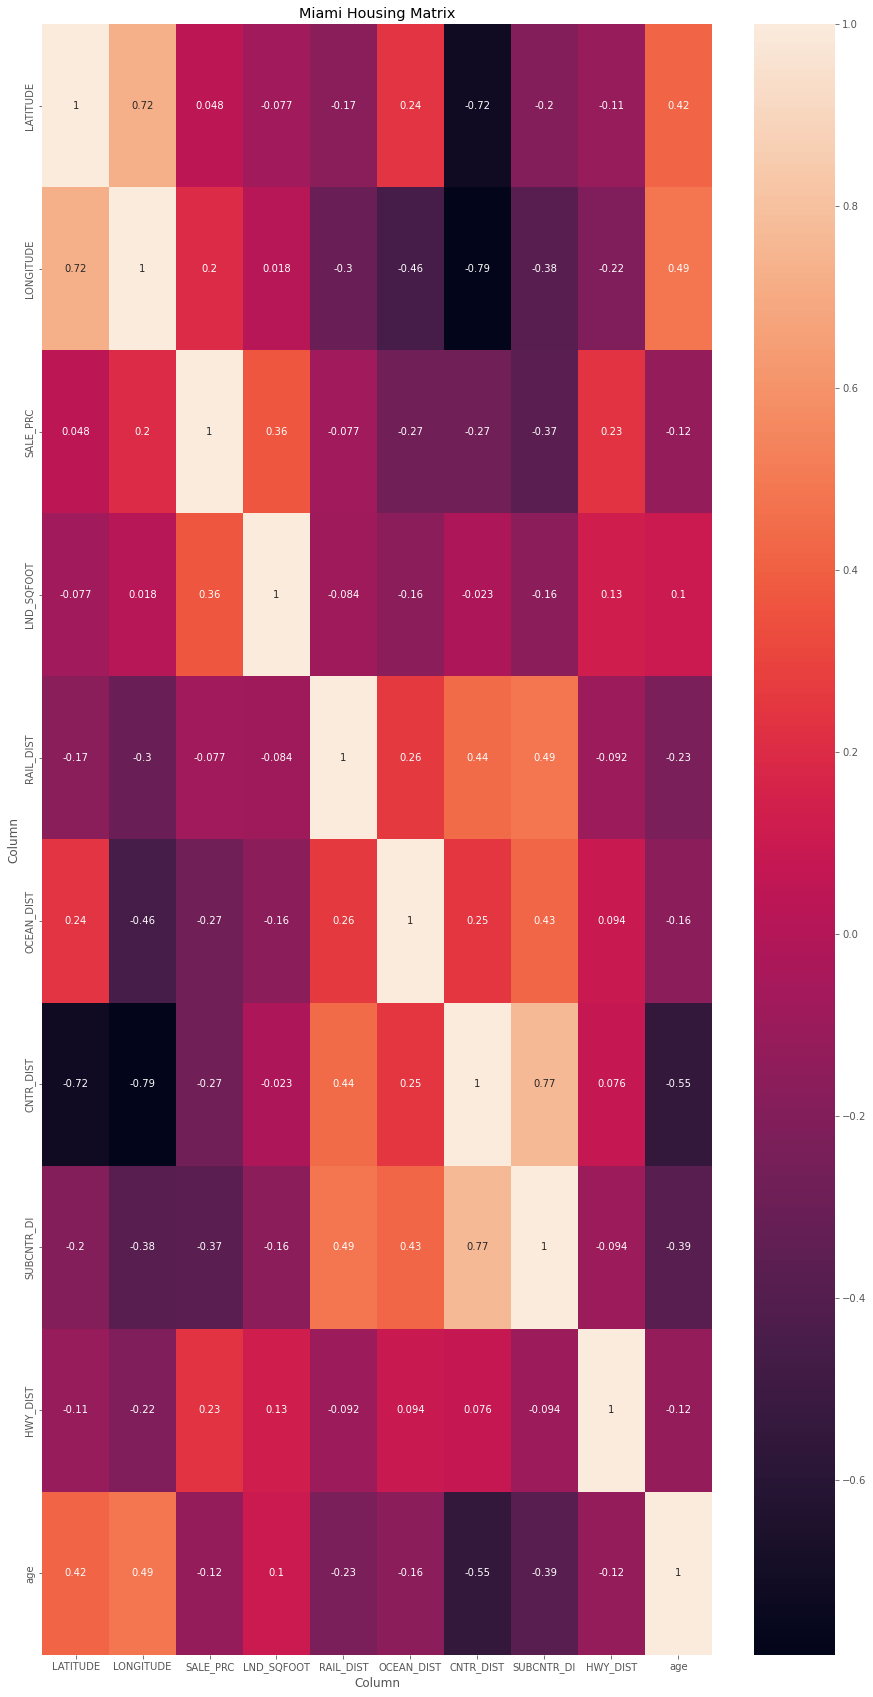

<Figure size 1080x2160 with 0 Axes>

In [15]:
# Correlation analysis
# For correlation, pearson is used because it shows the linear relationship between two sets of data.

df.corr(method='pearson') 
corr_matrix = df.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)
plt.title('Miami Housing Matrix')
plt.xlabel('Column')
plt.ylabel('Column')

plt.show()
# plt.savefig('miami_matrix.png')

In [12]:
# Miami housing analysis

# Creating a column of vector points 
df['house_pts'] = df[["LONGITUDE", "LATITUDE"]].apply(Point, axis=1)

# Converting our df dataframe to a geodataframe 
df_gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry="house_pts")

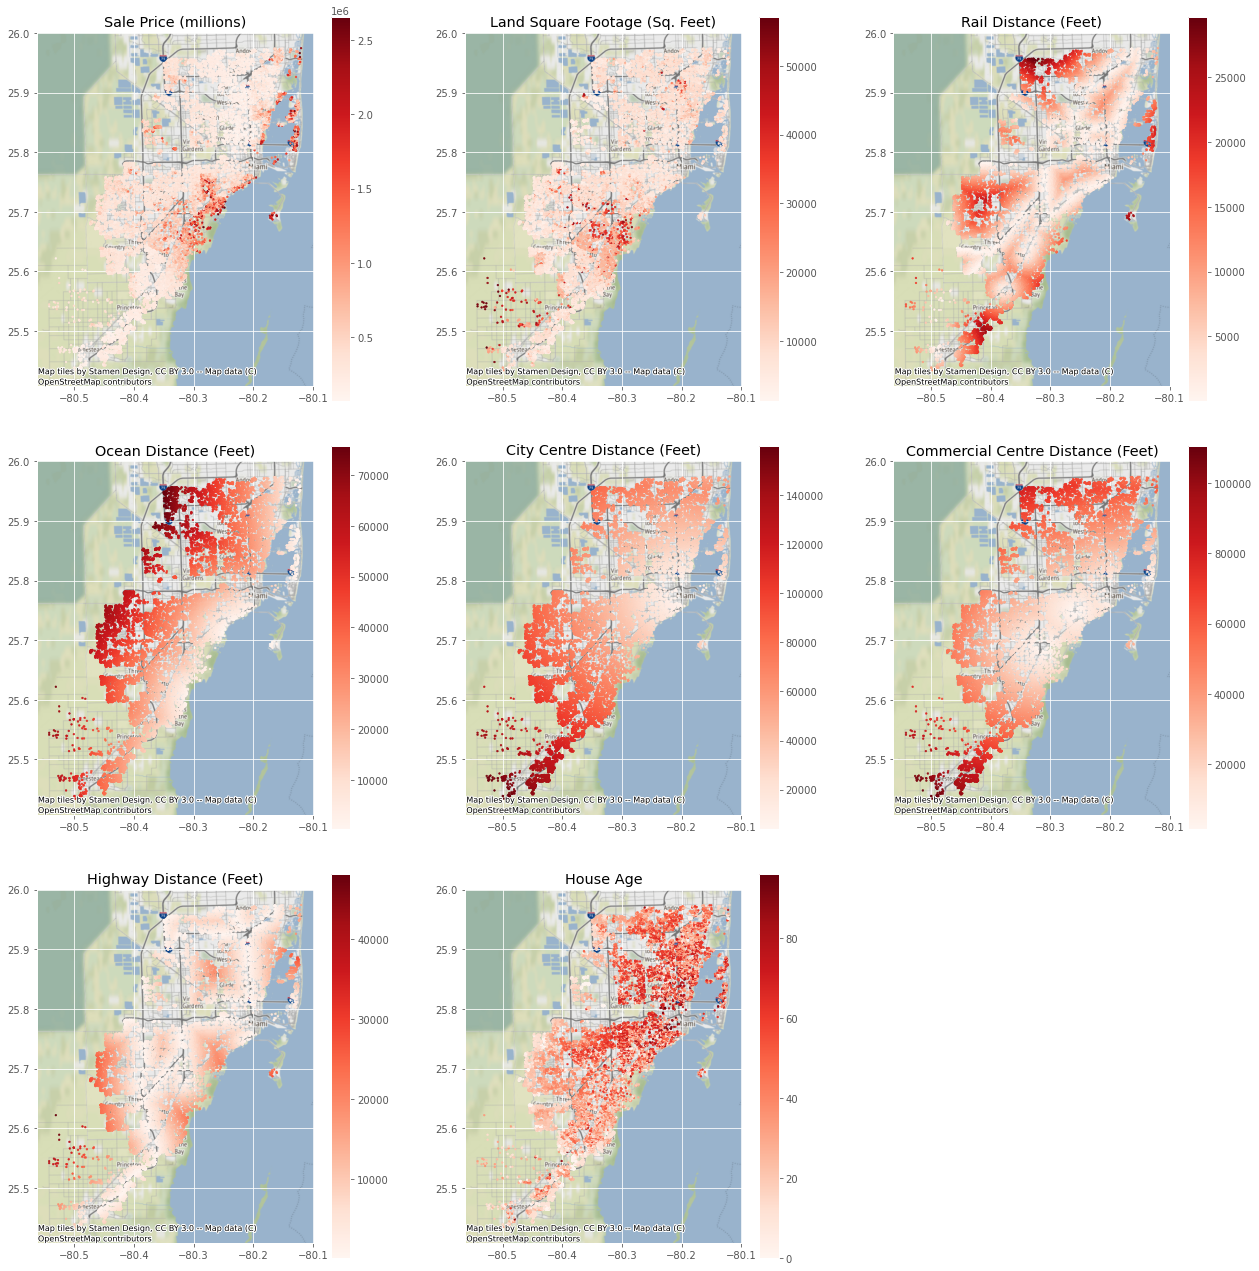

In [19]:
# Loop for creating the final product of 8 differnt maps

# Titles for each subplot
titles = ['Sale Price (millions)',
          'Land Square Footage (Sq. Feet)',
          'Rail Distance (Feet)',
         'Ocean Distance (Feet)',
         'City Centre Distance (Feet)',
         'Commercial Centre Distance (Feet)',
          'Highway Distance (Feet)',
         'House Age']

loop_list = ['SALE_PRC', 'LND_SQFOOT', 'RAIL_DIST',
       'OCEAN_DIST', 'CNTR_DIST', 'SUBCNTR_DI', 'HWY_DIST', 'age']

fig, axes = plt.subplots(3, 3, figsize=(18,18))

count = 0 
for i, (col, ax) in enumerate(zip(loop_list, axes.flat), 0):
    df_gdf.plot(ax=ax, marker='o', cmap='Reds', column=col, markersize=3, legend=True)
    ax.set_title(titles[count])
    ctx.add_basemap(ax, crs=df_gdf.crs)
    count+=1
fig.delaxes(axes[2][2])
fig.tight_layout()

plt.savefig('miami_maps.png')
